<a href="https://colab.research.google.com/github/MUHAMMADFAWWAZWIYOGA/DIF2130_A_25_2311532019/blob/main/NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***NAIVE BAYES***

# ***BERNOULINB***

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [4]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

<ipython-input-5-3d7c89935395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


<ipython-input-6-5e73eae386f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='viridis')


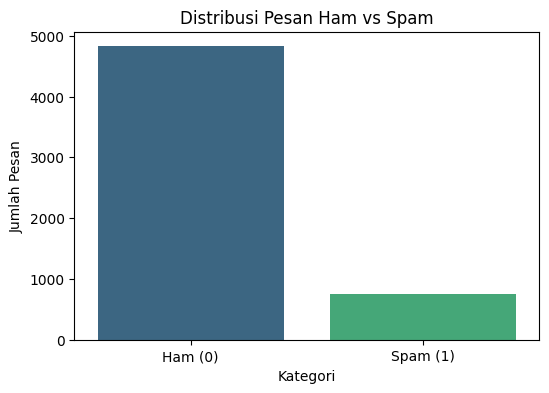

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette='viridis')
plt.xticks(ticks=[0,1], labels=['Ham (0)', 'Spam (1)'])
plt.title('Distribusi Pesan Ham vs Spam')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pesan')
plt.show()

In [7]:
def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'\W', ' ', text)  # Hapus karakter khusus
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi ekstra
    return text

df['clean_message'] = df['message'].apply(clean_text)

In [9]:
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english')) # Change set to list
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9704

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.96      0.81      0.88       150

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



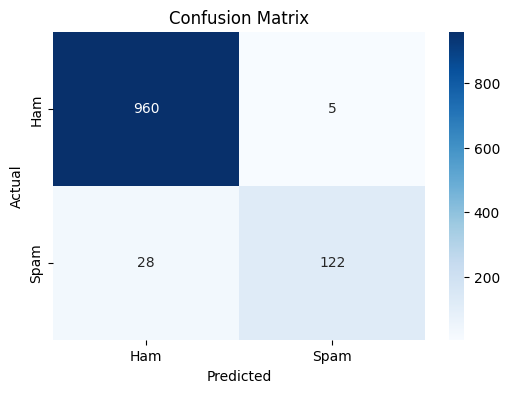

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ***CATEGORICALNB***

# ***COMPLEMENTNB***

# ***GAUSSIANNB***

# ***MULTINOMINALNB***